In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import IncrementalPCA

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [120]:
euro=False
countri = True
if euro:
    countries=pd.read_csv('euro_areas.csv')
    indic=['EC']
elif countri:
    countries=pd.read_csv('countries.csv')
    indic=['PPC']

In [76]:

ppp_cols = countries.columns[(countries.columns.str.contains(indic[0])) &
                                    (countries.columns.str.contains('val')) ]
countries = countries[ppp_cols.insert(0,'a_id_')]

In [77]:
countries

a_id_  val_FC021PPPC  \
0                              Afghanistan_Afghanistan   1.387476e+07   
1                                      Albania_Albania   5.174192e+08   
2                                      Algeria_Algeria   4.350838e+09   
3                                        Angola_Angola   4.269917e+09   
4                                  Argentina_Argentina   1.134171e+10   
..                                                 ...            ...   
159                      Uzbekistan_Uzbekistan - Total   2.133233e+09   
160  Venezuela (Bolivarian Republic of)_Venezuela -...   3.850861e+09   
161                           Viet Nam_Vietnam - Total   8.502915e+09   
162                              Zambia_Zambia - Total   2.317585e+08   
163                          Zimbabwe_Zimbabwe - Total   4.724848e+08   

     val_FC022PPPC  val_FC02PPPC  val_FC031PPPC  val_FC03PPPC  val_FC041PPPC  \
0     1.180449e+09  1.194324e+09   2.657708e+09  3.948151e+09   5.263597e+09   
1     3.513205e+08  8.687398e+08   8.565968e+08  1.271341e+09   1.497110e+09   
2     6.730366e+08  5.023875e+09   8.237471e+09  1.178841e+10   3.799890e+09   
3     6.660616e+08  4.935979e+09   4.362736e+09  6.212149e+09   2.795072e+09   
4     9.216918e+09  2.074214e+10   4.233229e+10  6.045323e+10   1.845505e+10   
..             ...           ...            ...           ...            ...   
159   1.446648e+09  3.579881e+09   8.022067e+09  1.191408e+10   1.621411e+10   
160   1.668380e+09  5.519254e+09   3.853655e+09  4.861303e+09   3.224245e+09   
161   5.589490e+09  1.415312e+10   1.855284e+10  2.753912e+10   2.504125e+10   
162   3.604577e+07  2.678044e+08   1.771382e+09  2.528483e+09   8.693840e+08   
163   7.515266e+07  5.476376e+08   8.245910e+08  1.173002e+09   1.064163e+09   

     val_FC043PPPC  val_FC045PPPC  val_FC055PPPC  ...  val_PEDY002_005PPPC_  \
0     9.886007e+08   4.895284e+09   7.969332e+07  ...          2.036897e+06   
1     2.811246e+08   1.393113e+09   6.120176e+07  ...          1.776205e+03   
2     1.287055e+09   5.074040e+09   6.041333e+08  ...          2.156386e+04   
3     1.017447e+09   3.742327e+09   3.980264e+08  ...          1.526271e+06   
4     3.425696e+09   1.268751e+10   1.132173e+09  ...          6.572914e+04   
..             ...            ...            ...  ...                   ...   
159   3.045949e+09   1.507531e+10   2.545910e+08  ...          1.876771e+05   
160   6.190530e+03   6.198929e+03   9.937401e+07  ...          3.842873e+05   
161   4.703886e+09   2.329154e+10   1.698380e+09  ...          9.145735e+05   
162   3.162026e+08   1.179908e+09   3.527546e+07  ...          1.304571e+06   
163   3.942197e+08   1.457706e+09   1.545085e+08  ...          1.475135e+06   

     val_PEDY005_007PPPC_  val_PEDY007_010PPPC_  val_PEDY020_035PPPC_  \
0            2.150695e+06           1698891.800            752012.060   
1            8.104724e+03             17606.048            252756.960   
2            1.144921e+05            259583.340           2813138.000   
3            1.200855e+06            946270.540            963572.000   
4            2.396127e+05            452970.280           4546954.000   
..                    ...                   ...                   ...   
159          4.697803e+05            681382.580           2697206.000   
160          7.721469e+05            941665.820           1805056.000   
161          2.098751e+06           2829890.800           8086123.800   
162          6.126951e+05            381893.320            240569.680   
163          5.871798e+05            305982.800             76065.978   

     val_PEDY035_070PPPC_  val_PEDY070_100PPPC_  val_PEDY100_150PPPC_  \
0              136291.460          5.174383e+03             723.94946   
1              304607.260          8.427108e+04           42129.99600   
2             2265733.200          3.682726e+05          117764.06400   
3              449171.680          6.623511e+04           32638.07000   
4             490768

In [78]:
# calculate the ratio of indicators in the same cattegory
def getRatios(data, index):
    cols = data.columns[data.columns.str.contains(index)]
    agg = data[cols].sum(axis=1)
    agg
    for i in cols:
        data[i] = data[i]/agg 
    return(data)
countries = getRatios(countries, 'FC')
countries = getRatios(countries, 'PEDY')

In [79]:
#scale data with standard scaler
def scaleData(selection):
    scaler = StandardScaler()
    scal_selection = selection
    col = scal_selection.columns[1:]
    scal_selection[col] = StandardScaler().fit_transform(selection[col])
    return(scal_selection)

scal_countries=scaleData(countries)
scal_countries.to_csv('scaled_countries.csv', index=False)

In [92]:
pca = PCA(svd_solver='randomized', random_state=42)

# Feature variable to X
X = scal_countries.drop(['a_id_'],axis=1)

# Response variable to y
y = scal_countries['a_id_']

pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [93]:
pca.components_
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2        Feature
0 -0.163565 -0.161341  val_FC021PPPC
1  0.056983 -0.140169  val_FC022PPPC
2 -0.104281 -0.202702   val_FC02PPPC
3 -0.160161  0.037865  val_FC031PPPC
4 -0.184647  0.032411   val_FC03PPPC

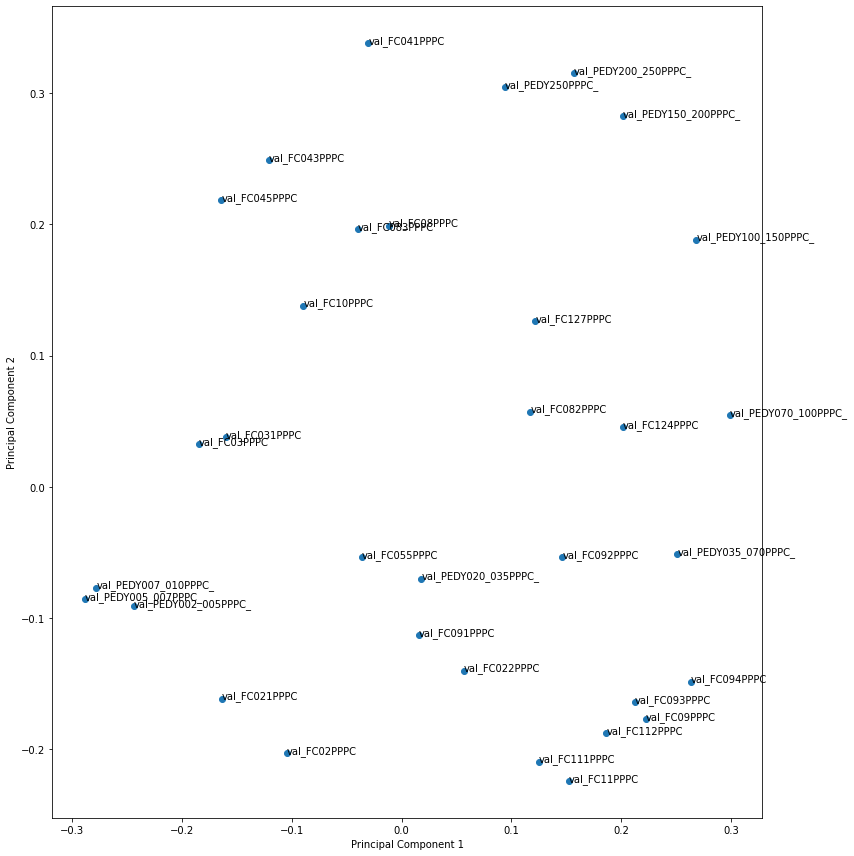

In [94]:
%matplotlib inline
fig = plt.figure(figsize = (12,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [95]:
pca.explained_variance_ratio_

array([2.65695279e-01, 1.26478058e-01, 1.04536416e-01, 8.85459766e-02,
       7.41401181e-02, 5.23956018e-02, 4.70081335e-02, 3.42154318e-02,
       3.01608540e-02, 2.97796563e-02, 2.39766797e-02, 2.01819271e-02,
       1.73630253e-02, 1.59675769e-02, 1.45501818e-02, 1.22368705e-02,
       9.60029486e-03, 8.46481473e-03, 7.51602028e-03, 7.24380827e-03,
       4.73816116e-03, 3.39259826e-03, 9.73648158e-04, 4.88872964e-04,
       1.52699722e-04, 9.00263556e-05, 6.96707211e-05, 2.07893440e-05,
       1.35785836e-05, 3.22929688e-06, 4.48864026e-16, 3.93799264e-33,
       1.02676599e-33])

In [96]:
(np.cumsum(pca.explained_variance_ratio_))

array([0.26569528, 0.39217334, 0.49670975, 0.58525573, 0.65939585,
       0.71179145, 0.75879958, 0.79301502, 0.82317587, 0.85295553,
       0.87693221, 0.89711413, 0.91447716, 0.93044473, 0.94499492,
       0.95723179, 0.96683208, 0.9752969 , 0.98281292, 0.99005673,
       0.99479489, 0.99818748, 0.99916113, 0.99965001, 0.99980271,
       0.99989273, 0.9999624 , 0.99998319, 0.99999677, 1.        ,
       1.        , 1.        , 1.        ])

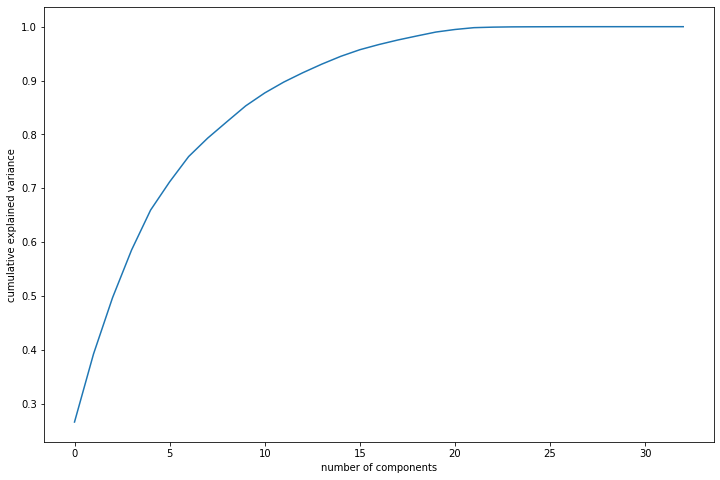

In [98]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# plt.savefig('pca_no')
plt.show()

In [99]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
PCA_components =16
pca_final = IncrementalPCA(n_components=PCA_components)

df_pca = pca_final.fit_transform(X)
df_pca.shape

(164, 16)

In [100]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

0         1         2         3         4         5         6   \
0 -4.204424  1.928791  1.219497 -0.036179 -0.096454  0.956990  1.066362   
1  3.047532 -2.282283 -1.435838 -3.499899 -1.208886  1.689590  2.259558   
2 -0.402104  1.114214  5.014635 -1.245152 -1.375632  4.040988 -2.566580   
3 -3.741088 -1.063240 -1.786549  0.561631  0.501865 -0.167904  0.033471   
4  0.816695 -1.809512  0.100956 -0.161575 -1.201056 -1.458305 -1.439990   

         7         8         9         10        11        12        13  \
0 -2.859544  0.873750  0.363021  0.354171 -0.332395  1.445930  1.154088   
1  2.411151  0.135227  2.529334 -1.500716 -1.340981  1.530753  0.421133   
2 -0.966335 -0.708883  0.396818  1.463959 -0.077619 -1.714676 -0.221451   
3  1.549769  0.882804 -0.873268  0.022705  0.294925 -0.289671  0.050363   
4  0.590664  0.284000  0.947813 -0.212196 -0.678050  0.560399 -0.804438   

         14        15  
0 -0.967256 -0.349896  
1  0.922739  0.355112  
2  0.272989  0.141817  
3 -0.150510  0.239684  
4  0.460297 -0.421998

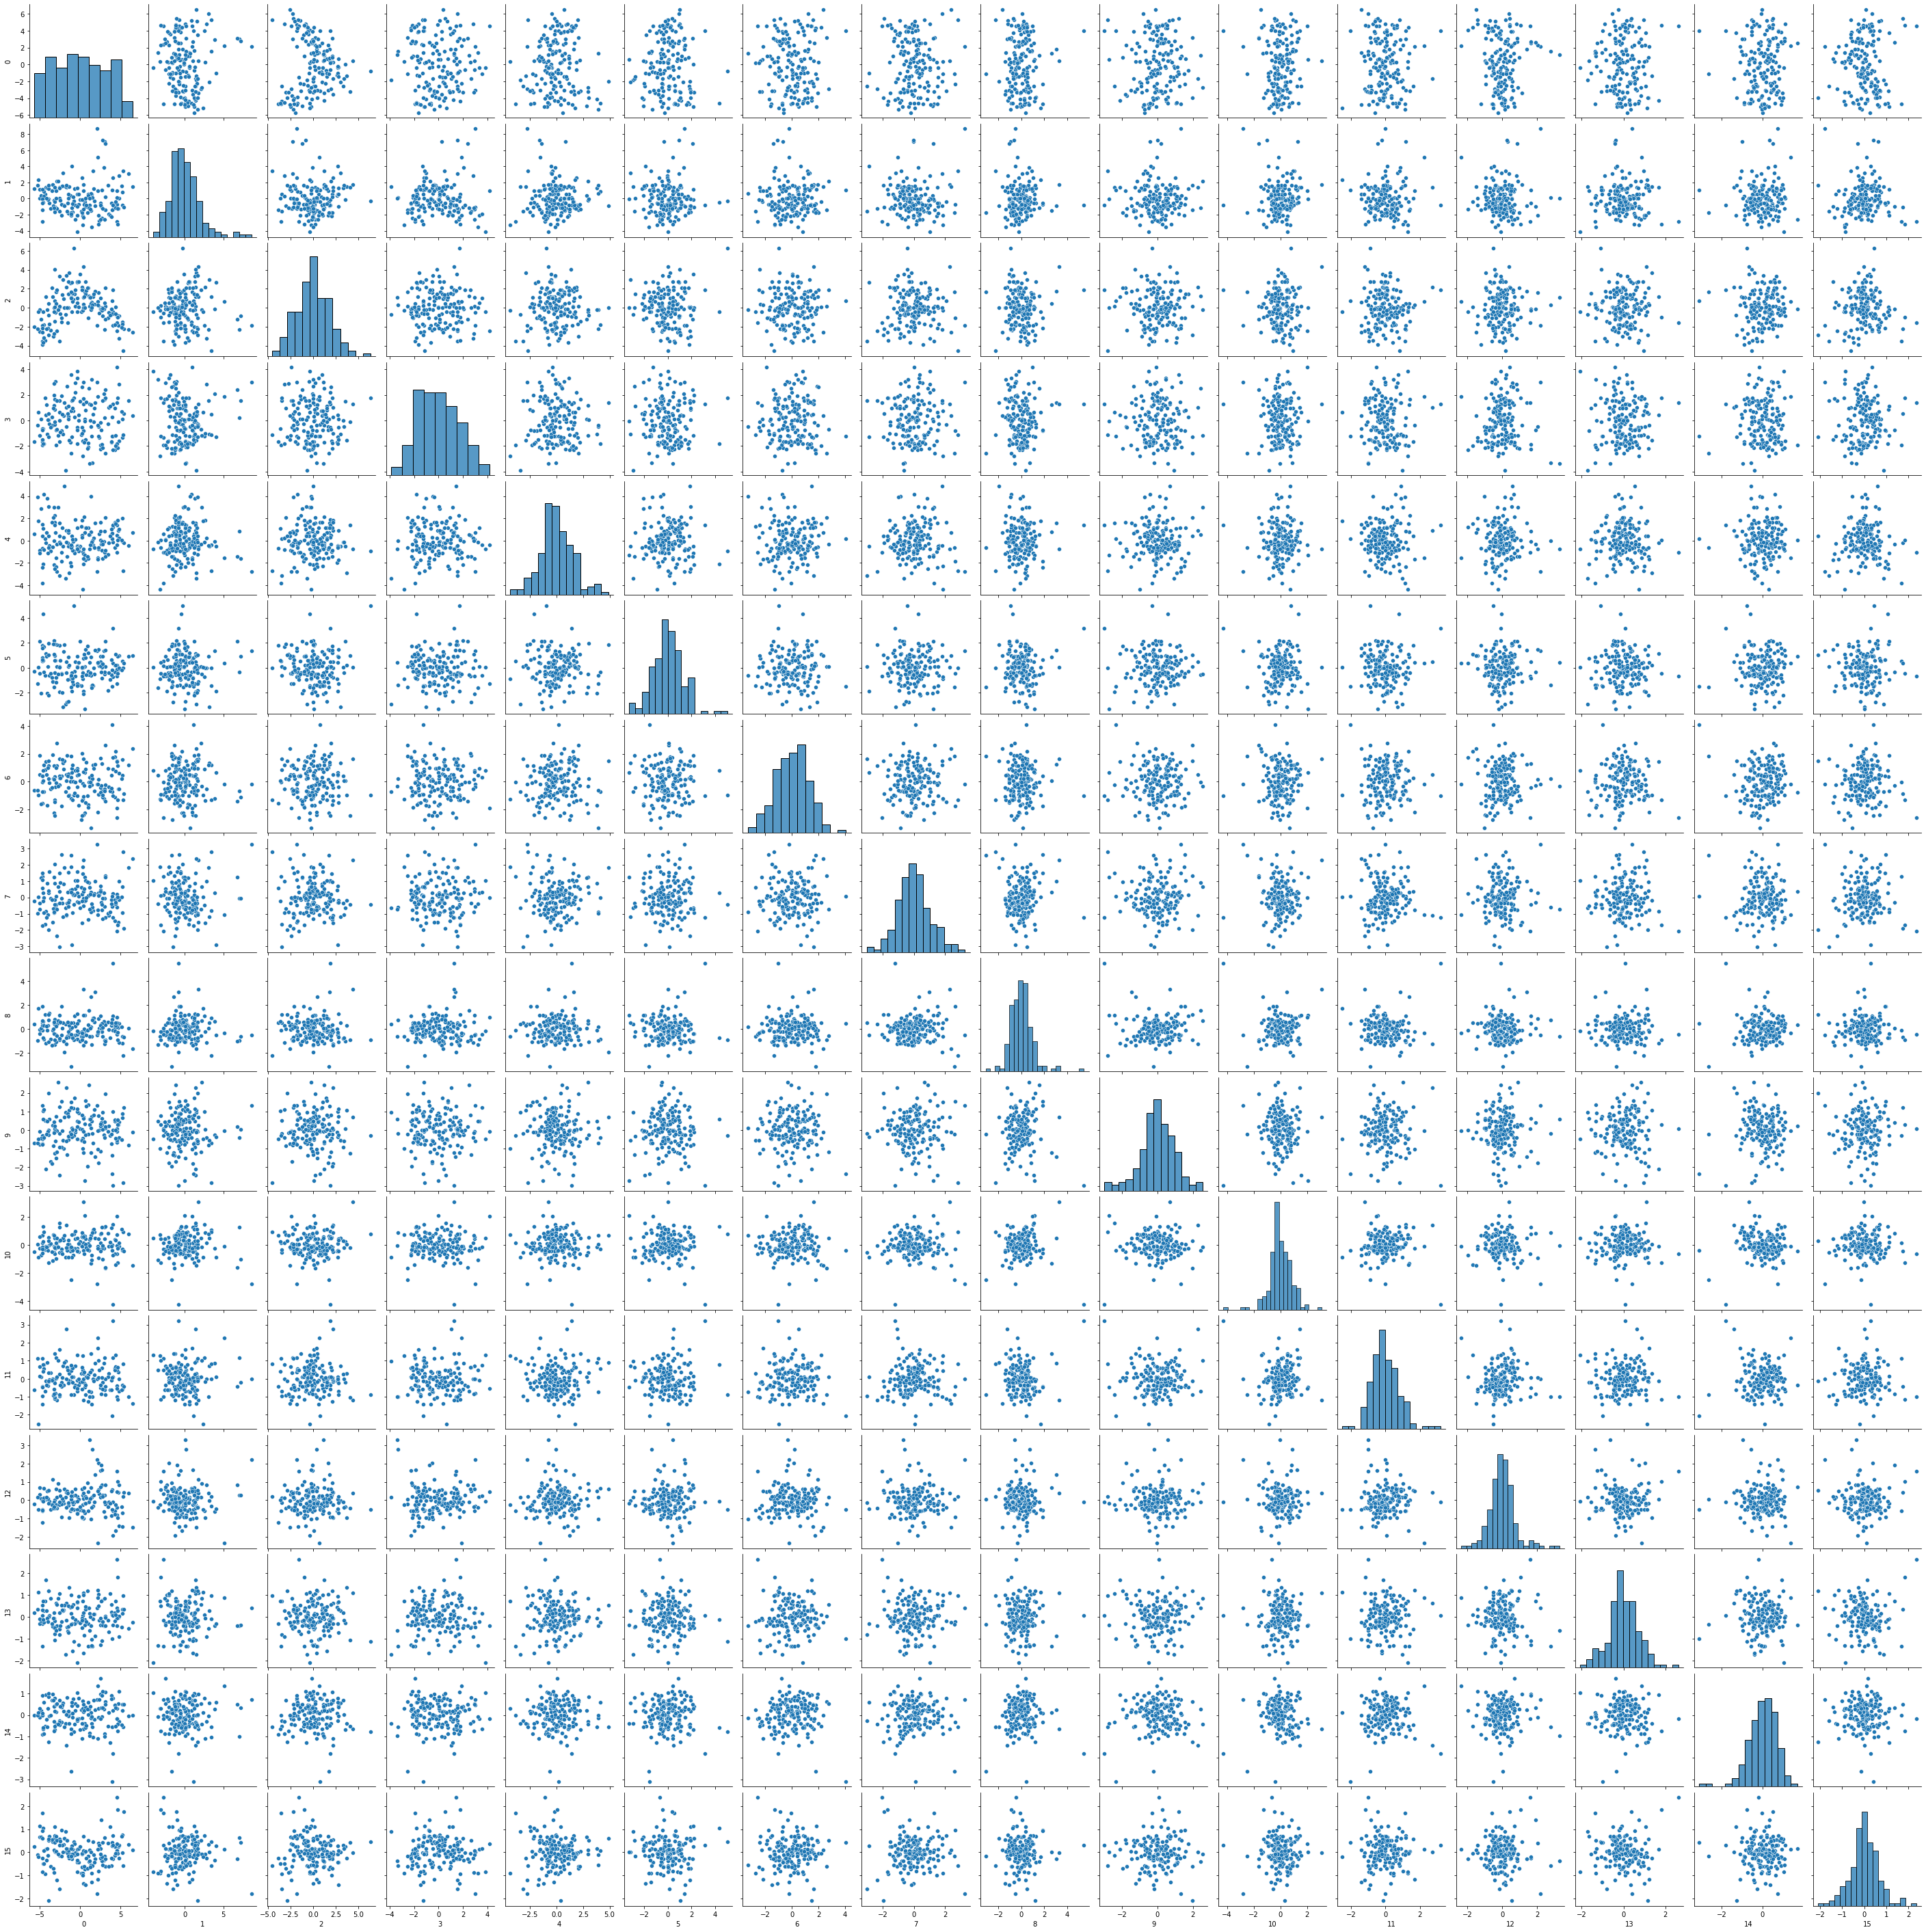

In [172]:
# As expected there is no multicollinearity in the dataset
sns.pairplot(df_pca)

<AxesSubplot:>

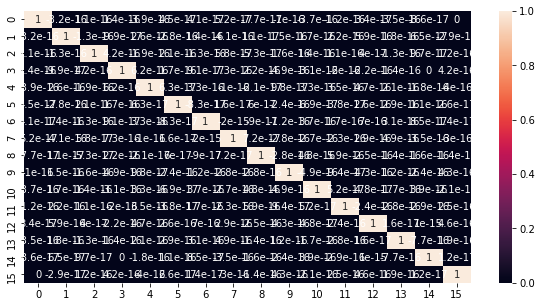

In [101]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [102]:
#Hopkins Statistics:
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

    hopkins(df_pca)

In [103]:
# hopkins score above 0.7 shows high clustering
hopkins(df_pca)

0.722312573772764

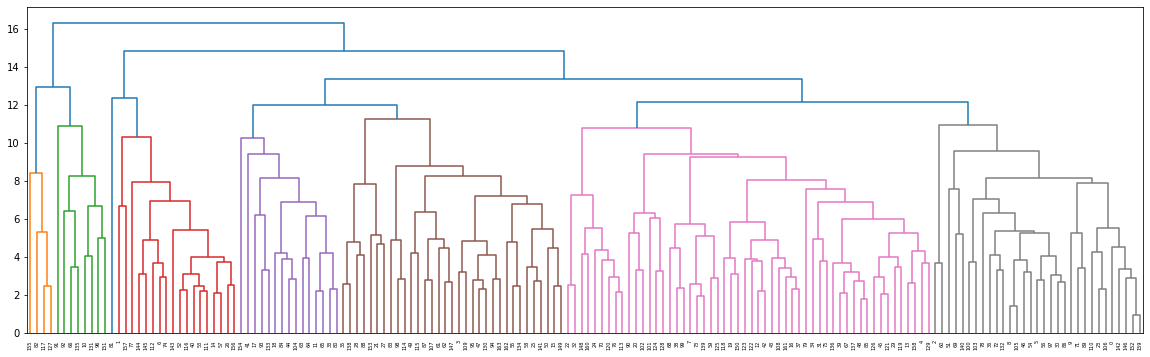

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.rcParams["figure.figsize"] = (20,6)
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [105]:
# The dedrogram shows the optimum cutting.
from scipy.cluster.hierarchy import cut_tree
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 7).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
cols = []
for i in range(0,PCA_components):
    cols.append('PCA_'+str(i))
cols.append('ClusterID')
df_pca_hc.columns = cols
df_pca_hc['ClusterID']=clusterCut.values
df_pca_hc.head()

PCA_0     PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
0 -4.204424  1.928791  1.219497 -0.036179 -0.096454  0.956990  1.066362   
1  3.047532 -2.282283 -1.435838 -3.499899 -1.208886  1.689590  2.259558   
2 -0.402104  1.114214  5.014635 -1.245152 -1.375632  4.040988 -2.566580   
3 -3.741088 -1.063240 -1.786549  0.561631  0.501865 -0.167904  0.033471   
4  0.816695 -1.809512  0.100956 -0.161575 -1.201056 -1.458305 -1.439990   

      PCA_7     PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13  \
0 -2.859544  0.873750  0.363021  0.354171 -0.332395  1.445930  1.154088   
1  2.411151  0.135227  2.529334 -1.500716 -1.340981  1.530753  0.421133   
2 -0.966335 -0.708883  0.396818  1.463959 -0.077619 -1.714676 -0.221451   
3  1.549769  0.882804 -0.873268  0.022705  0.294925 -0.289671  0.050363   
4  0.590664  0.284000  0.947813 -0.212196 -0.678050  0.560399 -0.804438   

     PCA_14    PCA_15  ClusterID  
0 -0.967256 -0.349896          0  
1  0.922739  0.355112          1  
2  0.272989  0.141817          0  
3 -0.150510  0.239684          2  
4  0.460297 -0.421998          3

In [106]:
pca_cluster_hc = pd.concat([scal_countries['a_id_'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

a_id_     PCA_0     PCA_1     PCA_2     PCA_3     PCA_4  \
0  Afghanistan_Afghanistan -4.204424  1.928791  1.219497 -0.036179 -0.096454   
1          Albania_Albania  3.047532 -2.282283 -1.435838 -3.499899 -1.208886   
2          Algeria_Algeria -0.402104  1.114214  5.014635 -1.245152 -1.375632   
3            Angola_Angola -3.741088 -1.063240 -1.786549  0.561631  0.501865   
4      Argentina_Argentina  0.816695 -1.809512  0.100956 -0.161575 -1.201056   

      PCA_5     PCA_6     PCA_7     PCA_8     PCA_9    PCA_10    PCA_11  \
0  0.956990  1.066362 -2.859544  0.873750  0.363021  0.354171 -0.332395   
1  1.689590  2.259558  2.411151  0.135227  2.529334 -1.500716 -1.340981   
2  4.040988 -2.566580 -0.966335 -0.708883  0.396818  1.463959 -0.077619   
3 -0.167904  0.033471  1.549769  0.882804 -0.873268  0.022705  0.294925   
4 -1.458305 -1.439990  0.590664  0.284000  0.947813 -0.212196 -0.678050   

     PCA_12    PCA_13    PCA_14    PCA_15  ClusterID  
0  1.445930  1.154088 -0.967256 -0.349896          0  
1  1.530753  0.421133  0.922739  0.355112          1  
2 -1.714676 -0.221451  0.272989  0.141817          0  
3 -0.289671  0.050363 -0.150510  0.239684          2  
4  0.560399 -0.804438  0.460297 -0.421998          3

In [107]:
clustered_data_hc = pca_cluster_hc[['a_id_','ClusterID']].merge(countries, on = 'a_id_')
clustered_data_hc.head()

a_id_  ClusterID  val_FC021PPPC  val_FC022PPPC  \
0  Afghanistan_Afghanistan          0      -1.178811       1.194992   
1          Albania_Albania          1      -0.362414      -0.057272   
2          Algeria_Algeria          0      -0.105984      -0.886545   
3            Angola_Angola          2       1.626907      -0.316832   
4      Argentina_Argentina          3      -0.222285       0.414119   

   val_FC02PPPC  val_FC031PPPC  val_FC03PPPC  val_FC041PPPC  val_FC043PPPC  \
0     -0.536316       0.288178      0.434158       1.469413       0.737409   
1     -0.352928      -0.845461     -0.727939      -0.201401      -0.508458   
2     -0.469327      -0.220872     -0.157791      -1.076246      -0.818201   
3      1.208289       0.532451      0.572359      -0.536288       0.019393   
4     -0.034366       1.209703      1.246608      -0.697013      -0.886000   

   val_FC045PPPC  ...  val_PEDY002_005PPPC_  val_PEDY005_007PPPC_  \
0       1.610982  ...              1.054851              2.294369   
1      -0.308463  ...             -0.592993             -0.746147   
2      -1.028675  ...             -0.586577             -0.666834   
3      -0.132697  ...              1.014096              1.433688   
4      -1.163955  ...             -0.577125             -0.664506   

   val_PEDY007_010PPPC_  val_PEDY020_035PPPC_  val_PEDY035_070PPPC_  \
0              2.236888             -1.047658             -1.618008   
1             -0.708168              0.706716              0.892163   
2             -0.458883              1.613500              0.637887   
3              1.340673             -0.498709             -1.201845   
4             -0.546930              0.853452              0.751432   

   val_PEDY070_100PPPC_  val_PEDY100_150PPPC_  val_PEDY150_200PPPC_  \
0             -1.280656             -0.973422             -0.654680   
1              0.370647              0.002552             -0.211537   
2             -0.409179             -0.643215             -0.564834   
3             -1.109253             -0.869502             -0.586760   
4              0.195306             -0.109672             -0.258421   

   val_PEDY200_250PPPC_  val_PEDY250PPPC_  
0             -0.484561         -0.283770  
1             -0.270022         -0.238009  
2             -0.451707         -0.277391  
3             -0.436565         -0.261220  
4             -0.288659         -0.240028  

[5 rows x 35 columns]

<AxesSubplot:xlabel='ClusterID'>

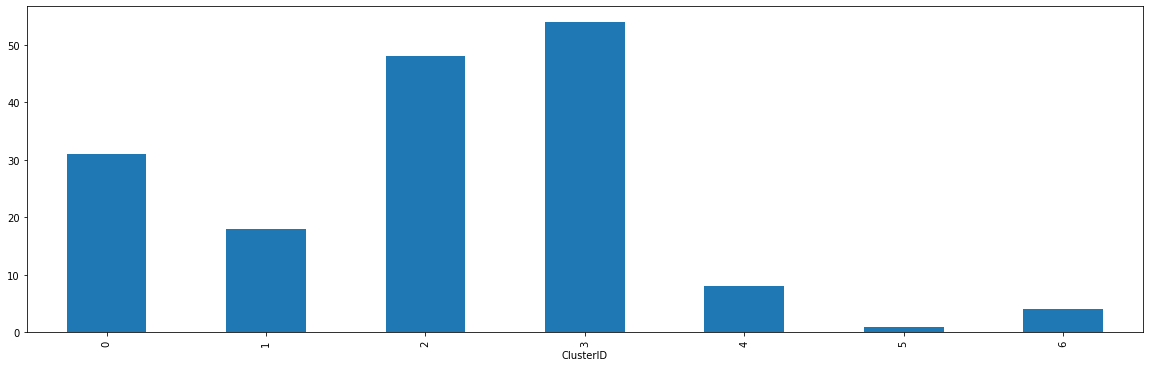

In [108]:
clustered_data_hc.groupby('ClusterID').size().plot(kind='bar')

In [111]:
clustered_data_hc[clustered_data_hc['ClusterID']==3].head()

a_id_  ClusterID  val_FC021PPPC  \
4                        Argentina_Argentina          3      -0.222285   
7                            Austria_Austria          3      -0.644322   
12                         Barbados_Barbados          3      -0.412695   
13                           Belarus_Belarus          3       0.540954   
16  Bolivia (Plurinational State of)_Bolivia          3      -0.960978   

    val_FC022PPPC  val_FC02PPPC  val_FC031PPPC  val_FC03PPPC  val_FC041PPPC  \
4        0.414119     -0.034366       1.209703      1.246608      -0.697013   
7        0.134831     -0.463761      -0.293346     -0.475411      -0.679481   
12      -0.221554     -0.460572      -0.198261     -0.358598      -0.400929   
13       1.766068      1.130861      -0.456883     -0.393607      -0.105282   
16      -0.918126     -1.197458      -0.210479     -0.077822      -0.785378   

    val_FC043PPPC  val_FC045PPPC  ...  val_PEDY002_005PPPC_  \
4       -0.886000      -1.163955  ...             -0.577125   
7       -0.462890      -0.839878  ...             -0.605603   
12      -0.444061      -0.883629  ...             -0.448036   
13      -0.447951      -0.662187  ...             -0.603571   
16      -0.944218      -0.980564  ...              0.087607   

    val_PEDY005_007PPPC_  val_PEDY007_010PPPC_  val_PEDY020_035PPPC_  \
4              -0.664506             -0.546930              0.853452   
7              -0.847058             -0.988639             -0.596294   
12             -0.355458             -0.181206              0.446552   
13             -0.789345             -0.692480              2.293806   
16              0.842646              1.280626              0.506446   

    val_PEDY035_070PPPC_  val_PEDY070_100PPPC_  val_PEDY100_150PPPC_  \
4               0.751432              0.195306             -0.109672   
7               1.134944              1.591649              1.041761   
12              0.328481              0.193390              0.141513   
13              0.484747             -0.766441             -0.768318   
16             -0.681031             -0.933559             -0.822035   

    val_PEDY150_200PPPC_  val_PEDY200_250PPPC_  val_PEDY250PPPC_  
4              -0.258421             -0.288659         -0.240028  
7               0.315258             -0.028875         -0.198609  
12              0.063821             -0.001067         -0.097405  
13             -0.600748             -0.468652         -0.282034  
16             -0.600285             -0.458638         -0.277836  

[5 rows x 35 columns]

In [122]:
if euro:
    clustered_data_hc.to_csv('euro_cluster.csv', index = False)
elif countri:
    clustered_data_hc.to_csv('country_cluster.csv', index = False)